In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
url = 'https://drive.google.com/open?id=1TOY_tOk_6TWwvtin4pv0crv3eNFweGE5'
fluff, id = url.split('=')

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('reviews_detailed.csv')  
data = pd.read_csv('reviews_detailed.csv')

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader_polarity_compound = lambda s: (SentimentIntensityAnalyzer().polarity_scores(s))['compound']

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
!pip install langid

     |████████████████████████████████| 1.9MB 4.8MB/s 
  Created wheel for langid: filename=langid-1.1.6-cp36-none-any.whl size=1941190 sha256=8e448816bc77353a70cc66561f7690d31941f9484be8adb6a3c247856d63ae78
  Stored in directory: /root/.cache/pip/wheels/29/bc/61/50a93be85d1afe9436c3dc61f38da8ad7b637a38af4824e86e
Successfully built langid


In [ ]:
import langid

In [ ]:
data.shape

(732710, 6)

In [ ]:
langidl = []
for index, row in data.iterrows():
  langidl.append(langid.classify(str(row['comments']))[0])

In [ ]:
data['language'] = langidl

In [ ]:
data.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
0,6369,29428,2010-03-14,84790,Nancy,Simon and Arturo have the ultimate location in...,en
1,6369,31018,2010-03-23,84338,David,Myself and Kristy originally planned on stayin...,en
2,6369,34694,2010-04-10,98655,Marion,We had a great time at Arturo and Simon's ! A ...,en
3,6369,37146,2010-04-21,109871,Kurt,I very much enjoyed the stay. \r\nIt's a wond...,en
4,6369,38168,2010-04-26,98901,Dennis,Arturo and Simon are polite and friendly hosts...,en


In [ ]:
ndata = data.copy()
ndata = ndata[ndata['language']!='en']
indexNames = ndata.index

In [ ]:
ndata = data.drop(indexNames)

In [ ]:
ndata.shape

(360070, 7)

In [ ]:
ndict = ndata.groupby('listing_id')['comments'].apply(list).to_dict()

In [ ]:
lsentiments = []

In [ ]:
i = 0
for key,val in ndict.items():
  review = "".join(str(val))
  sentiment = vader_polarity_compound(review)
  lsentiments.append(sentiment)
  i = i+1

In [ ]:
sentiments = {}
for key, value in zip(ndict.keys(),lsentiments):
  sentiments[key] = value

<BarContainer object of 3 artists>

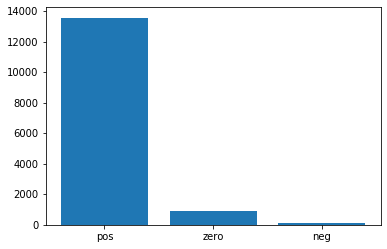

In [ ]:
from collections import Counter
sent_vals = list(sentiments.values())
sent_class = ['pos' if x > 0.0 else 'zero' if x == 0.0 else 'neg' for x in sent_vals]
c = Counter(sent_class)
plt.bar(c.keys(),c.values())

In [ ]:
url2 = 'https://drive.google.com/open?id=1BQbCNfayMVrUuJJ1JSJukzailvvowx53'
fluff, id = url2.split('=')

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('listing_detailed.csv')  
listings = pd.read_csv('listing_detailed.csv')
listings.head(5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20190919050215,2019-09-19,"Rooftop terrace room with ensuite bathroom, Airc.","Atico en la calle Principe de Vergara, con bañ...",BETTER THAN A HOTEL.Upscale neighboorhood (Met...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,none,Nice and definitely non touristic neighborhoo...,If you are a group/family 3 or 4 people we off...,Excelent public transport and easy Access to m...,"Full use of living room, kitchen (with dishwas...","English, spanish, german, russian, some french...",NaN,NaN,NaN,https://a0.muscache.com/im/pictures/683224/4cc...,NaN,13660,https://www.airbnb.com/users/show/13660,Simon,2009-04-16,"Madrid, Madrid, Spain","Gay couple, heterofriendly, enjoy having guest...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/13660/profile...,https://a0.muscache.com/im/users/13660/profile...,Hispanoamérica,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Madrid, Comunidad de Madrid, Spain",Chamartín,Hispanoamérica,...,$15.00,1,365,1,1,365,365,1.0,365.0,2 days ago,t,14,23,53,53,2019-09-19,65,6,2010-03-14,2019-09-04,98.0,10.0,10.0,9.0,10.0,9.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,0,1,0,0.56
1,21853,https://www.airbnb.com/rooms/21853,20190919050215,2019-09-19,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,none,We live in a leafy neighbourhood with plenty o...,We are a 15 min bus ride away from the Casa de...,The flat is near the centre of Madrid (15 minu...,There is fibre optic internet connection for y...,If I am at home and see each other around here...,Many thanks for not smoking at home.,NaN,NaN,https://a0.muscache.com/im/pictures/68483181/8...,NaN,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Madrid, Spain",EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/83531/profile...,https://a0.muscache.com/im/users/83531/profile...,Aluche,2.0,2.0,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,"Madrid, Madrid, Spain",Aluche,Cármenes,...,$8.00,4,40,4,4,40,40,4.0,40.0,8 months ago,t,0,0,0,48,2019-09-19,33,0,2014-10-10,2018-07-15,92.0,9.0,9.0,10.0,10.0,8.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,2,0,2,0,0.55
2,24805,https://www.airbnb.com/rooms/24805,20190919050215,2019-09-19,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...",LOCATION. Brand new flats near the Atlantic H...,"Studio located 50 meters from Gran Via, ne

In [ ]:
listings.shape

(20837, 106)

In [ ]:
len(sentiments)

14582

In [ ]:
indexListings = list(listings.id)
indexSentiments = list(sentiments.keys())
ids = [x for x in indexListings if x not in indexSentiments]
len(ids)

6255

In [ ]:
listings = listings[listings['id'].isin(ids) == False]
listings['sentiments'] = listings['id'].map(sentiments)
listings.shape

(14582, 107)

In [ ]:
import geopy.distance
coords_tourist_attractions = (40.4143744,-3.6958499)
listings['proximity_to_tourist_attr'] = listings.apply(lambda x: geopy.distance.vincenty(coords_tourist_attractions, (x['latitude'], x['longitude'])).km, axis = 1)

In [ ]:
features = listings[['price','host_since', 'host_response_time','host_response_rate','host_is_superhost',
                 'host_has_profile_pic','host_identity_verified','neighbourhood_group_cleansed',
                 'property_type','room_type','accommodates','bathrooms','bedrooms','beds',
                 'amenities','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                 'review_scores_communication','review_scores_location','review_scores_value',
                 'cancellation_policy','sentiments','guests_included','extra_people','availability_365',
                 'number_of_reviews','proximity_to_tourist_attr']]

In [ ]:
features = features.dropna()

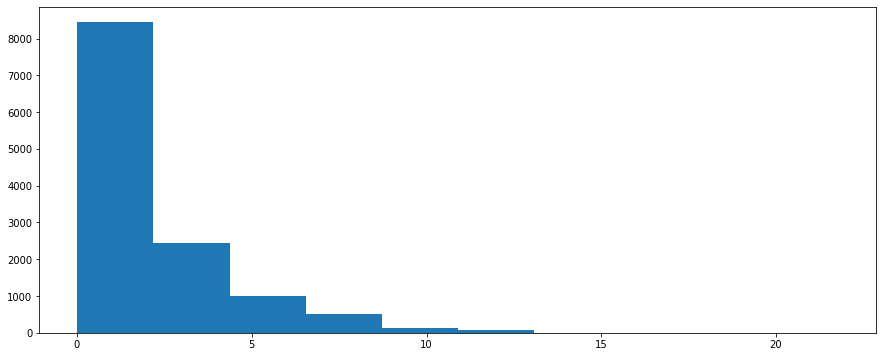

In [ ]:
plt.hist(features['proximity_to_tourist_attr'])
plt.rcParams['figure.figsize'] = (10, 6)

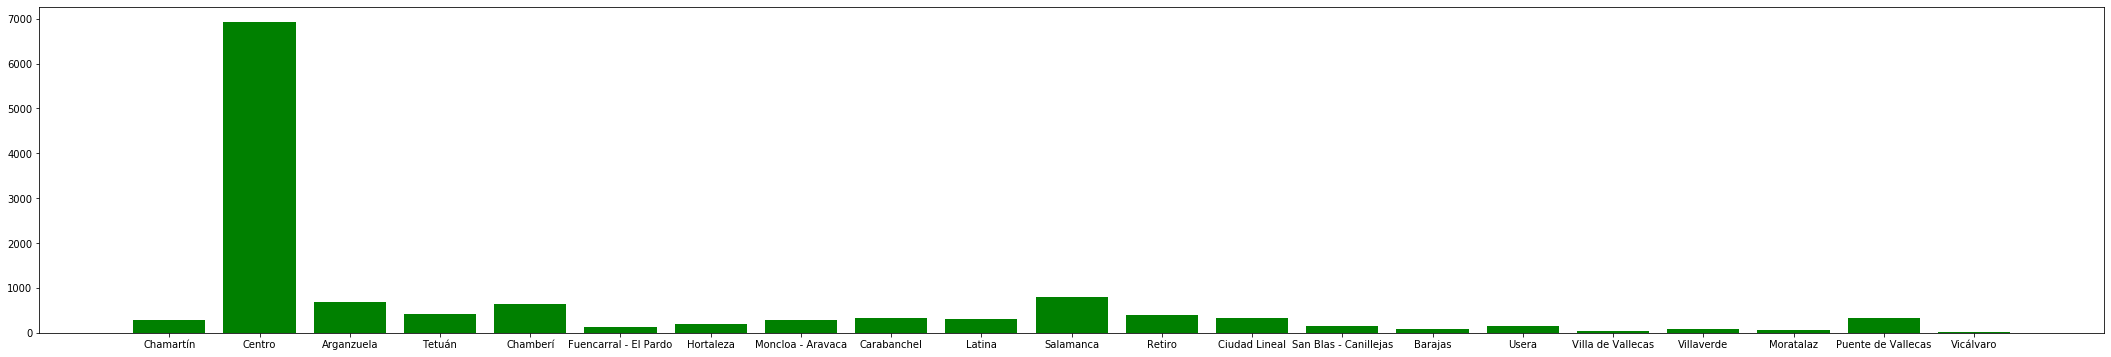

In [ ]:
c = Counter(features['neighbourhood_group_cleansed'])
plt.bar(c.keys(),c.values(), color = 'g')
plt.rcParams['figure.figsize'] = (37, 6)

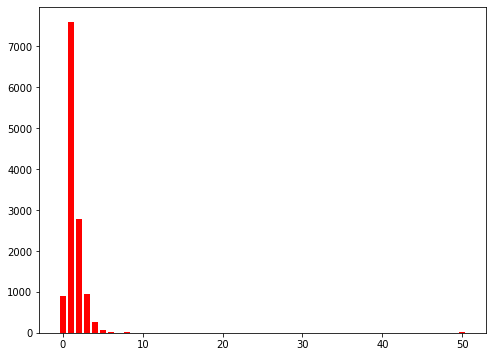

In [ ]:
c = Counter(features['bedrooms'])
plt.bar(c.keys(),c.values(), color = 'r')
plt.rcParams['figure.figsize'] = (8, 6)

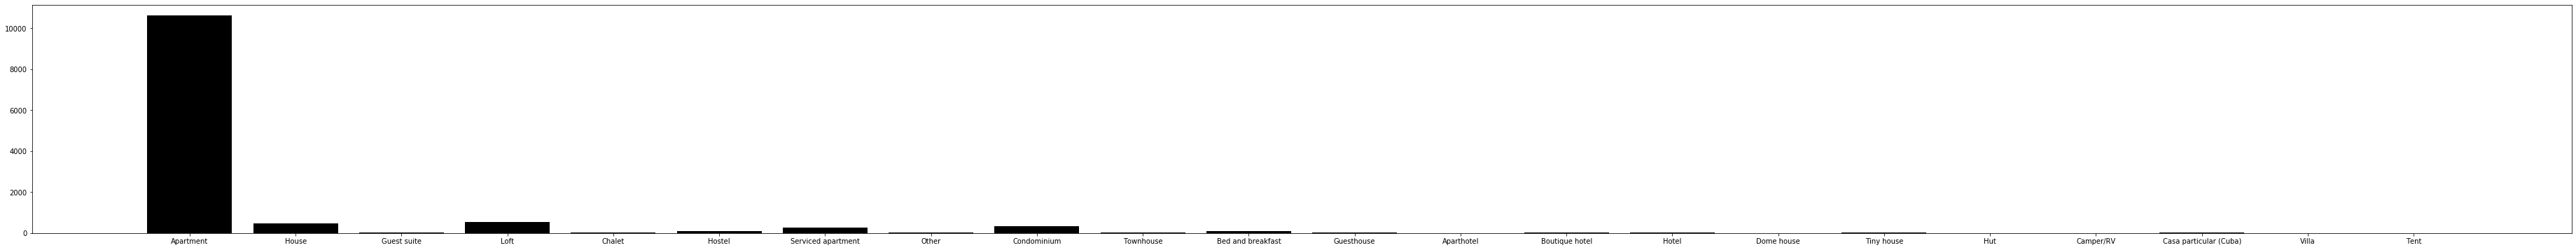

In [ ]:
c = Counter(features['property_type'])
plt.bar(c.keys(),c.values(), color = 'black')
plt.rcParams['figure.figsize'] = (65, 6)

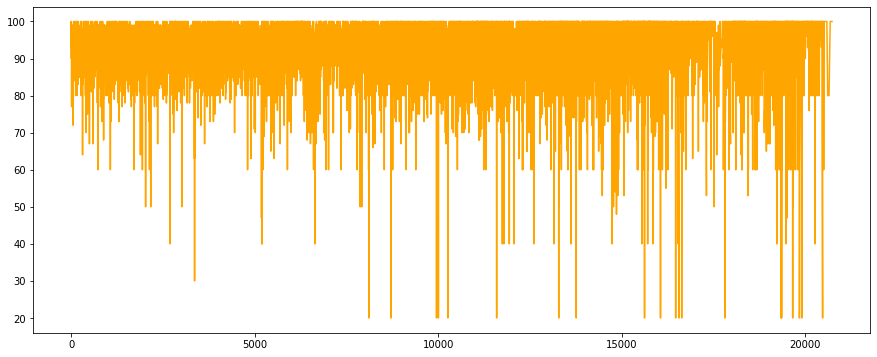

In [ ]:
plt.plot(features['review_scores_rating'], color = 'orange')
plt.rcParams['figure.figsize'] = (15, 6)

In [ ]:
features.shape

(12610, 28)

In [ ]:
from datetime import date
features['host_since']=(pd.to_datetime('today')-pd.to_datetime(features['host_since'],format='%Y-%m-%d')).dt.days

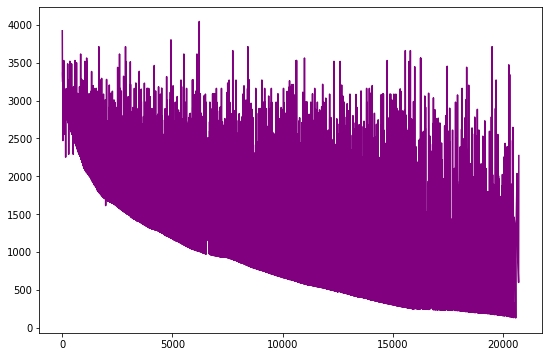

In [ ]:
plt.plot(features['host_since'], color = 'purple')
plt.rcParams['figure.figsize'] = (9, 6)

In [ ]:
features = pd.get_dummies(features, columns=['host_response_time','property_type','neighbourhood_group_cleansed',
                                             'room_type','cancellation_policy'],prefix='', prefix_sep='')

In [ ]:
features['host_is_superhost']=features['host_is_superhost'].map({'t': 1, 'f': 0})
features['host_has_profile_pic']=features['host_has_profile_pic'].map({'t': 1, 'f': 0})
features['host_identity_verified']=features['host_identity_verified'].map({'t': 1, 'f': 0})

In [ ]:
features.head(5)

,price,host_since,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,amenities,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,sentiments,guests_included,extra_people,availability_365,number_of_reviews,proximity_to_tourist_attr,a few days or more,within a day,within a few hours,within an hour,Aparthotel,Apartment,Bed and breakfast,Boutique hotel,Camper/RV,Casa particular (Cuba),Chalet,Condominium,Dome house,Guest suite,Guesthouse,Hostel,Hotel,House,Hut,Loft,Other,Serviced apartment,Tent,Tiny house,Townhouse,Villa,Arganzuela,Barajas,Carabanchel,Centro,Chamartín,Chamberí,Ciudad Lineal,Fuencarral - El Pardo,Hortaleza,Latina,Moncloa - Aravaca,Moratalaz,Puente de Vallecas,Retiro,Salamanca,San Blas - Canillejas,Tetuán,Usera,Vicálvaro,Villa de Vallecas,Villaverde,Entire home/apt,Hotel room,Private room,Shared room,flexible,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60
0,$70.00,3922,100%,0,1,0,2,1.0,1.0,0.0,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",98.0,10.0,10.0,10.0,9.0,10.0,1.0000,2,$15.00,53,65,4.903403,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,$80.00,3573,100%,0,1,1,3,1.0,0.0,1.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",100.0,8.0,8.0,10.0,10.0,10.0,0.9115,2,$0.00,354,2,1.092421,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,$115.00,3573,100%,1,1,0,4,1.5,2.0,3.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",98.0,10.0,10.0,10.0,10.0,10.0,1.0000,4,$0.00,301,64,0.637498,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,$25.00,3546,100%,0,1,1,1,1.0,1.0,1.0,"{Wifi,""Wheelchair accessible"",Doorman,Elevator...",94.0,10.0,10.0,10.0,10.0,10.0,1.0000,1,$0.00,337,136,2.766497,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
5,$65.00,3519,100%,1,1,0,2,1.0,1.0,2.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",93.0,10.0,10.0,10.0,10.0,10.0,1.0000,1,$18.00,322,168,0.658313,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure

In [ ]:
features = features.reset_index()
del features['index']

In [ ]:
for i in range(features.shape[0]):
  rt = features['amenities'][i].replace('"','')
  rt = rt.replace('{','')
  rt = rt.replace('}','')
  features['amenities'][i]=rt.split(',')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
features['amenities'].apply(pd.Series).stack().value_counts()

Wifi                   12297
Essentials             12170
Heating                11663
Kitchen                11635
Hangers                11037
                       ...  
HBO GO                     1
Amazon Echo                1
Waterfront                 1
Ground floor access        1
Jetted tub                 1
Length: 175, dtype: int64

In [ ]:
amenities = pd.get_dummies(features['amenities'].apply(pd.Series).stack()).sum(level=0)

In [ ]:
amenities = amenities.drop(columns='')

In [ ]:
amenities.head(5)

,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Amazon Echo,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Balcony,Bath towel,Bathroom essentials,Bathtub,Bathtub with bath chair,Beach essentials,Beach view,Beachfront,Bed linens,Bedroom comforts,Bidet,Body soap,Breakfast,Breakfast table,Building staff,Buzzer/wireless intercom,Cable TV,Carbon monoxide detector,Cat(s),Ceiling fan,Central air conditioning,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Convection oven,Cooking basics,Crib,DVD player,...,Shampoo,Shared pool,Shower chair,Single level home,Ski-in/Ski-out,Smart TV,Smart lock,Smoke detector,Smoking allowed,Soaking tub,Sound system,Stair gates,Standing valet,Steam oven,Stove,Suitable for events,Sun loungers,TV,Table corner guards,Terrace,Toilet paper,Touchless faucets,Walk-in shower,Warming drawer,Washer,Washer / Dryer,Waterfront,Well-lit path to entrance,Wheelchair accessible,Wide clearance to shower,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,Wine cooler,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
features = pd.concat([features.drop('amenities', axis=1), amenities], axis=1)

In [ ]:
features.shape

(12610, 253)

In [ ]:
features['host_response_rate'] = features['host_response_rate'].str.replace(r'%', r'.0').astype('float')
features.head(5)

,price,host_since,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,sentiments,guests_included,extra_people,availability_365,number_of_reviews,proximity_to_tourist_attr,a few days or more,within a day,within a few hours,within an hour,Aparthotel,Apartment,Bed and breakfast,Boutique hotel,Camper/RV,Casa particular (Cuba),Chalet,Condominium,Dome house,Guest suite,Guesthouse,Hostel,Hotel,House,...,Shampoo,Shared pool,Shower chair,Single level home,Ski-in/Ski-out,Smart TV,Smart lock,Smoke detector,Smoking allowed,Soaking tub,Sound system,Stair gates,Standing valet,Steam oven,Stove,Suitable for events,Sun loungers,TV,Table corner guards,Terrace,Toilet paper,Touchless faucets,Walk-in shower,Warming drawer,Washer,Washer / Dryer,Waterfront,Well-lit path to entrance,Wheelchair accessible,Wide clearance to shower,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,Wine cooler,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,$70.00,3922,100.0,0,1,0,2,1.0,1.0,0.0,98.0,10.0,10.0,10.0,9.0,10.0,1.0000,2,$15.00,53,65,4.903403,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,$80.00,3573,100.0,0,1,1,3,1.0,0.0,1.0,100.0,8.0,8.0,10.0,10.0,10.0,0.9115,2,$0.00,354,2,1.092421,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,$115.00,3573,100.0,1,1,0,4,1.5,2.0,3.0,98.0,10.0,10.0,10.0,10.0,10.0,1.0000,4,$0.00,301,64,0.637498,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,$25.00,3546,100.0,0,1,1,1,1.0,1.0,1.0,94.0,10.0,10.0,10.0,10.0,10.0,1.0000,1,$0.00,337,136,2.766497,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1
4,$65.00,3519,100.0,1,1,0,2,1.0,1.0,2.0,93.0,10.0,10.0,10.0,10.0,10.0,1.0000,1,$18.00,322,168,0.658313,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
features['price']=features['price'].replace('[\$\,]', '', regex=True).astype(float)
features['extra_people']=features['extra_people'].replace('[\$\,]', '', regex=True).astype(float)
features.head(5)

,price,host_since,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,sentiments,guests_included,extra_people,availability_365,number_of_reviews,proximity_to_tourist_attr,a few days or more,within a day,within a few hours,within an hour,Aparthotel,Apartment,Bed and breakfast,Boutique hotel,Camper/RV,Casa particular (Cuba),Chalet,Condominium,Dome house,Guest suite,Guesthouse,Hostel,Hotel,House,...,Shampoo,Shared pool,Shower chair,Single level home,Ski-in/Ski-out,Smart TV,Smart lock,Smoke detector,Smoking allowed,Soaking tub,Sound system,Stair gates,Standing valet,Steam oven,Stove,Suitable for events,Sun loungers,TV,Table corner guards,Terrace,Toilet paper,Touchless faucets,Walk-in shower,Warming drawer,Washer,Washer / Dryer,Waterfront,Well-lit path to entrance,Wheelchair accessible,Wide clearance to shower,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,Wine cooler,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,70.0,3922,100.0,0,1,0,2,1.0,1.0,0.0,98.0,10.0,10.0,10.0,9.0,10.0,1.0000,2,15.0,53,65,4.903403,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,80.0,3573,100.0,0,1,1,3,1.0,0.0,1.0,100.0,8.0,8.0,10.0,10.0,10.0,0.9115,2,0.0,354,2,1.092421,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,115.0,3573,100.0,1,1,0,4,1.5,2.0,3.0,98.0,10.0,10.0,10.0,10.0,10.0,1.0000,4,0.0,301,64,0.637498,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,25.0,3546,100.0,0,1,1,1,1.0,1.0,1.0,94.0,10.0,10.0,10.0,10.0,10.0,1.0000,1,0.0,337,136,2.766497,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1
4,65.0,3519,100.0,1,1,0,2,1.0,1.0,2.0,93.0,10.0,10.0,10.0,10.0,10.0,1.0000,1,18.0,322,168,0.658313,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
labels = np.array(features['price'])
features = features.drop('price', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels,  test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (9457, 252)
Training Labels Shape: (9457,)
Testing Features Shape: (3153, 252)
Testing Labels Shape: (3153,)


In [ ]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(train_features,train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [ ]:
predictions = rf.predict(test_features)
pred_errs = abs(predictions - test_labels)
print('Mean absolute error: ', round(np.mean(pred_errs),2))

Mean absolute error:  36.23


In [ ]:
mape = 100 * (pred_errs / test_labels)
accuracy = 100 - np.mean(mape)
print("Accuracy: ", round(accuracy, 2), "%")

Accuracy:  55.49 %


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf_random = RandomizedSearchCV(rf, random_grid, n_iter=30, cv=3, random_state=42,verbose=50)
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, score=0.163, total=   1.9s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, score=0.293, total=   1.9s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_fe

In [ ]:
predictions = rf_random.best_estimator_.predict(test_features)
pred_errs = abs(predictions - test_labels)
mape = 100 * (pred_errs / test_labels)
accuracy = 100 - np.mean(mape)
print("Accuracy: ", round(accuracy, 2), "%")

Accuracy:  56.48 %


In [ ]:
importances = list(rf_random.best_estimator_.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key= lambda x: x[1], reverse=True)
feature_importances = [(feature, importance) for (feature, importance) in feature_importances if (feature, importance) != (feature, 0.0)]
feature_importances

[('host_since', 0.06),
 ('proximity_to_tourist_attr', 0.06),
 ('host_response_rate', 0.04),
 ('Safety card', 0.04),
 ('sentiments', 0.03),
 ('availability_365', 0.03),
 ('number_of_reviews', 0.03),
 ('within a few hours', 0.03),
 ('First aid kit', 0.03),
 ('Lock on bedroom door', 0.03),
 ('Pets allowed', 0.03),
 ('accommodates', 0.02),
 ('bedrooms', 0.02),
 ('beds', 0.02),
 ('review_scores_rating', 0.02),
 ('review_scores_cleanliness', 0.02),
 ('guests_included', 0.02),
 ('extra_people', 0.02),
 ('Loft', 0.02),
 ('moderate', 0.02),
 ('bathrooms', 0.01),
 ('review_scores_accuracy', 0.01),
 ('review_scores_communication', 0.01),
 ('review_scores_location', 0.01),
 ('review_scores_value', 0.01),
 ('within an hour', 0.01),
 ('Apartment', 0.01),
 ('Hostel', 0.01),
 ('Centro', 0.01),
 ('Entire home/apt', 0.01),
 ('Private room', 0.01),
 ('flexible', 0.01),
 ('strict_14_with_grace_period', 0.01),
 ('Air conditioning', 0.01),
 ('Bed linens', 0.01),
 ('Carbon monoxide detector', 0.01),
 ('Coffe